In [1]:
!pip install 'zarr<3'
!pip install timm
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


In [3]:
# Cell 3: Import and create dataloaders
from dataset import Config, create_dataloaders

# Just use the correct relative path from your working directory
config = Config("configs/config_fold1.yaml")  # Note: "configs" not "config"
config.print_config()

train_loader, val_loader, test_loader = create_dataloaders(config)
print("\n✅ Ready to use!")

✅ CRC Dataset Package v1.0.0 loaded
CRC DATASET CONFIGURATION
Config File: configs/config_fold1.yaml
Zarr Base: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/ORION-CRC/zarr_data
Cache: ./cache/multimodal_dataset_cache_fold1.pkl
Strategy: memory

📊 Data Splits:
  Train: 33 samples
  Val: 9 samples
  Test: 8 samples

🔄 DataLoader:
  Batch Size: 4
  Num Workers: 0
  Pin Memory: True

🎨 Augmentation:
  Training: True
  Probability: 0.0

🎯 HV Maps:
  Generate: True
  Method: pannuke
  HE Nuclei: True
  HE Cells: True
  MIF Nuclei: True
  MIF Cells: True

🔍 Filtering:
  Min Instances: 0
  Filter Empty: True

CREATING DATALOADERS
Strategy: memory
Use Cache: True
Batch Size: 4
Num Workers: 0

Train split: 27 CRC + 6 Xenium samples
Val split: 7 CRC + 2 Xenium samples
Test split: 7 CRC + 1 Xenium samples

📦 Loading from cache: ./cache/combined_cache_train_cfd81fe4.pkl
📦 Loaded 2892 patches from cache
📦 Loading from cache: ./cache/combined_cache_val_54d8d998.pkl
📦 Loaded 1654 patches f

Visualizing samples at indices: [2787, 1354, 1391, 1167, 2558, 1196, 494, 1936, 1653, 2287]


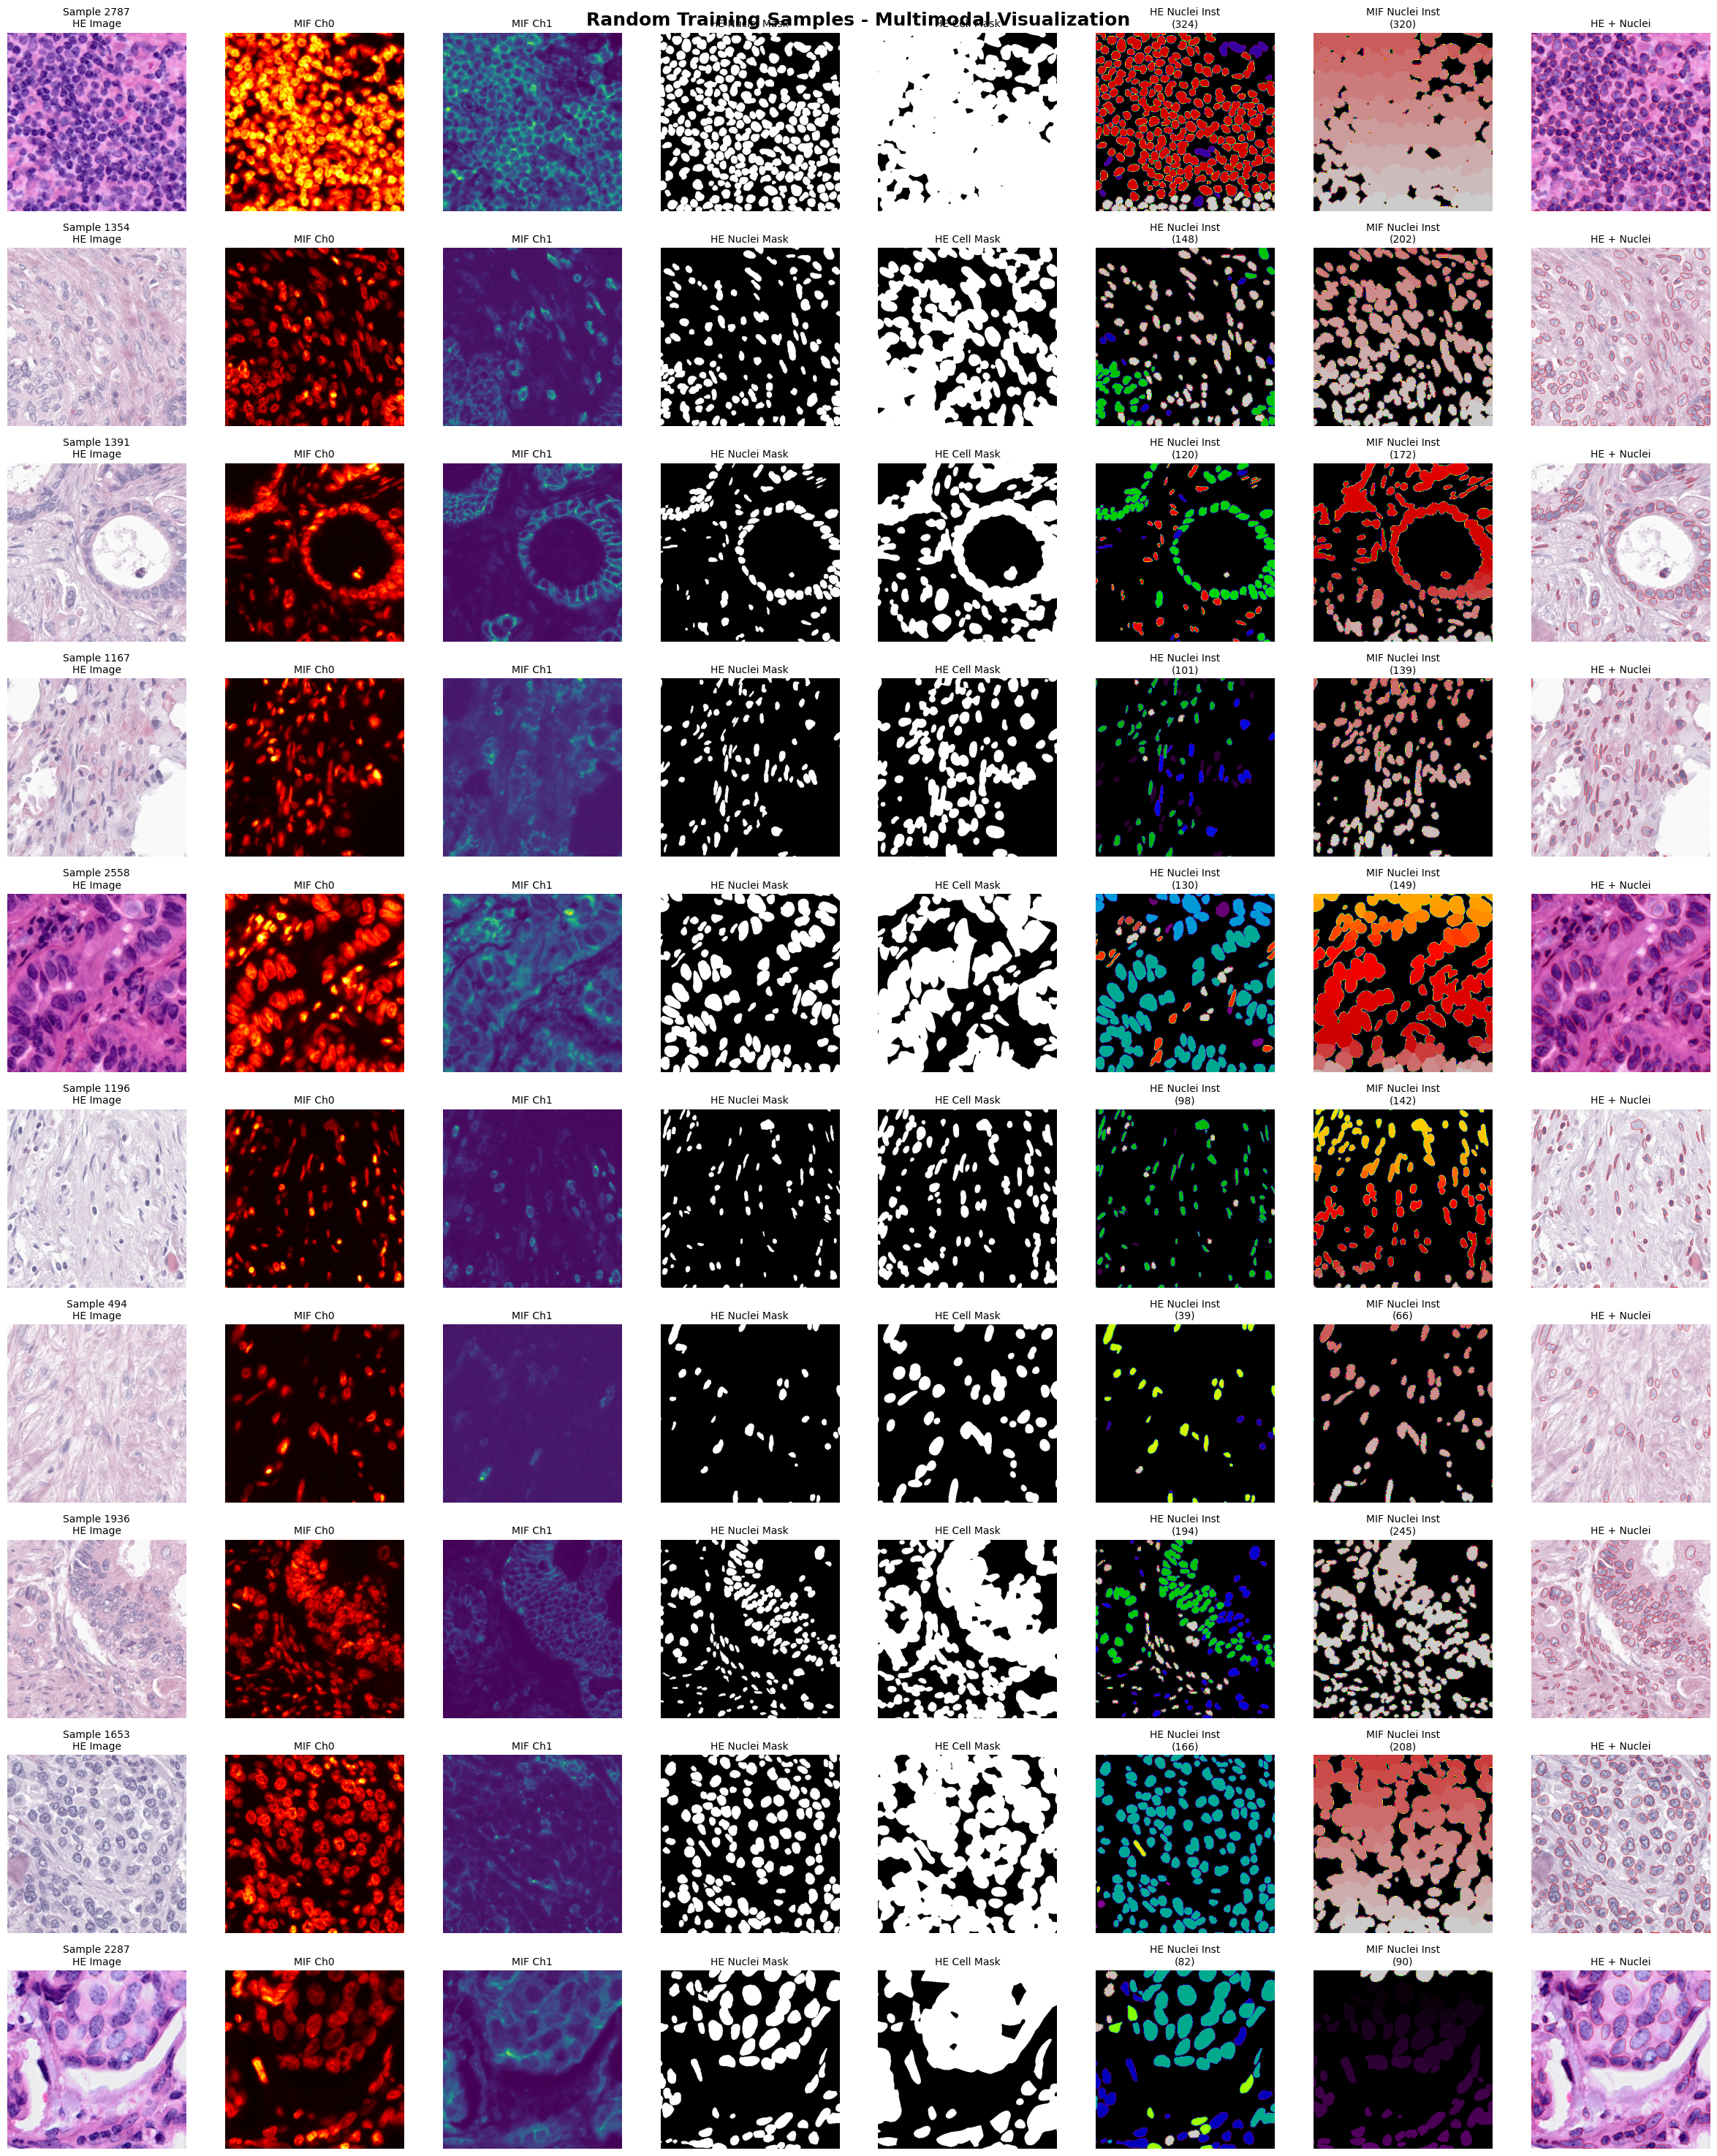


STATISTICS FOR VISUALIZED SAMPLES
Sample     HE Nuclei    HE Cells     MIF Nuclei   MIF Cells   
--------------------------------------------------------------------------------
2787       324          320          320          320         
1354       148          208          202          208         
1391       120          172          172          172         
1167       101          142          139          142         
2558       130          123          149          123         
1196       98           132          142          132         
494        39           69           66           69          
1936       194          270          245          270         
1653       166          212          208          212         
2287       82           75           90           75          


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get 5 random samples from the entire training set
n_samples = 10
total_batches = len(train_loader)
random_indices = random.sample(range(len(train_loader.dataset)), n_samples)

print(f"Visualizing samples at indices: {random_indices}")

fig, axes = plt.subplots(n_samples, 8, figsize=(24, 3*n_samples))
fig.suptitle('Random Training Samples - Multimodal Visualization', fontsize=18, fontweight='bold')

for row, sample_idx in enumerate(random_indices):
    # Get the sample
    sample = train_loader.dataset[sample_idx]
    
    # Column 0: HE Image
    he_img = sample['he_image'].permute(1, 2, 0).cpu().numpy()
    axes[row, 0].imshow(he_img)
    axes[row, 0].set_title(f'Sample {sample_idx}\nHE Image', fontsize=10)
    axes[row, 0].axis('off')
    
    # Column 1: MIF Channel 0
    mif_ch0 = sample['mif_image'][0].cpu().numpy()
    axes[row, 1].imshow(mif_ch0, cmap='hot')
    axes[row, 1].set_title('MIF Ch0', fontsize=10)
    axes[row, 1].axis('off')
    
    # Column 2: MIF Channel 1
    mif_ch1 = sample['mif_image'][1].cpu().numpy()
    axes[row, 2].imshow(mif_ch1, cmap='viridis')
    axes[row, 2].set_title('MIF Ch1', fontsize=10)
    axes[row, 2].axis('off')
    
    # Column 3: HE Nuclei Mask
    he_nuc_mask = sample['he_nuclei_mask'].cpu().numpy()
    axes[row, 3].imshow(he_nuc_mask, cmap='gray')
    axes[row, 3].set_title('HE Nuclei Mask', fontsize=10)
    axes[row, 3].axis('off')
    
    # Column 4: HE Cell Mask
    he_cell_mask = sample['he_cell_mask'].cpu().numpy()
    axes[row, 4].imshow(he_cell_mask, cmap='gray')
    axes[row, 4].set_title('HE Cell Mask', fontsize=10)
    axes[row, 4].axis('off')
    
    # Column 5: HE Nuclei Instances
    he_nuc_inst = sample['he_nuclei_instance'].cpu().numpy()
    n_he_nuc = len(np.unique(he_nuc_inst)) - 1
    axes[row, 5].imshow(he_nuc_inst, cmap='nipy_spectral')
    axes[row, 5].set_title(f'HE Nuclei Inst\n({n_he_nuc})', fontsize=10)
    axes[row, 5].axis('off')
    
    # Column 6: MIF Nuclei Instances
    mif_nuc_inst = sample['mif_nuclei_instance'].cpu().numpy()
    n_mif_nuc = len(np.unique(mif_nuc_inst)) - 1
    axes[row, 6].imshow(mif_nuc_inst, cmap='nipy_spectral')
    axes[row, 6].set_title(f'MIF Nuclei Inst\n({n_mif_nuc})', fontsize=10)
    axes[row, 6].axis('off')
    
    # Column 7: Overlay - HE with nuclei outlines
    overlay = he_img.copy()
    # Create nuclei boundaries
    from scipy import ndimage
    he_boundary = he_nuc_inst > 0
    he_boundary = he_boundary.astype(float) - ndimage.binary_erosion(he_boundary).astype(float)
    overlay[he_boundary > 0] = [1, 0, 0]  # Red boundaries
    axes[row, 7].imshow(overlay)
    axes[row, 7].set_title('HE + Nuclei', fontsize=10)
    axes[row, 7].axis('off')

plt.tight_layout()
plt.show()

# Print statistics for these samples
print("\n" + "=" * 80)
print("STATISTICS FOR VISUALIZED SAMPLES")
print("=" * 80)
print(f"{'Sample':<10} {'HE Nuclei':<12} {'HE Cells':<12} {'MIF Nuclei':<12} {'MIF Cells':<12}")
print("-" * 80)
for sample_idx in random_indices:
    sample = train_loader.dataset[sample_idx]
    he_nuc = len(np.unique(sample['he_nuclei_instance'].cpu().numpy())) - 1
    he_cell = len(np.unique(sample['he_cell_instance'].cpu().numpy())) - 1
    mif_nuc = len(np.unique(sample['mif_nuclei_instance'].cpu().numpy())) - 1
    mif_cell = len(np.unique(sample['mif_cell_instance'].cpu().numpy())) - 1
    print(f"{sample_idx:<10} {he_nuc:<12} {he_cell:<12} {mif_nuc:<12} {mif_cell:<12}")

## Cell 1: Multi-Fold Data Integrity Check

In [9]:
import os
import yaml
import pandas as pd

def get_fold_stats(config_path, fold_idx):
    with open(config_path, 'r') as f:
        cfg = yaml.safe_load(f)
    
    splits = cfg['splits']
    
    # Helper to count CRC vs Xenium in a list
    def count_types(sample_list):
        crc = len([s for s in sample_list if str(s).startswith('CRC')])
        xenium = len([s for s in sample_list if not str(s).startswith('CRC')])
        return crc, xenium

    train_c, train_x = count_types(splits['train_samples'])
    val_c, val_x = count_types(splits['val_samples'])
    test_c, test_x = count_types(splits['test_samples'])
    
    return {
        "Fold": f"Fold {fold_idx}",
        "Train (CRC/Xen)": f"{train_c}/{train_x}",
        "Val (CRC/Xen)": f"{val_c}/{val_x}",
        "Test (CRC/Xen)": f"{test_c}/{test_x}",
        "Total Samples": len(splits['all_samples'])
    }

# list of your config files
config_files = [
    "configs/config_fold1.yaml",
    "configs/config_fold2.yaml",
    "configs/config_fold3.yaml"
]

fold_data = []
for i, path in enumerate(config_files, 1):
    if os.path.exists(path):
        fold_data.append(get_fold_stats(path, i))

df_folds = pd.DataFrame(fold_data)
print("### 3-FOLD CROSS-VALIDATION STRATEGY ###")
display(df_folds)

# Extraction for paper text
total_unique_samples = 50 # Based on your config list
print(f"\n--- Draft for Methods Section ---")
print(f"We implemented a stratified 3-fold cross-validation split across {total_unique_samples} unique specimens.")
print(f"Each fold maintains a consistent ratio of approximately 82% CRC and 18% Xenium samples to prevent modality bias.")

### 3-FOLD CROSS-VALIDATION STRATEGY ###


Fold Train (CRC/Xen) Val (CRC/Xen) Test (CRC/Xen)  Total Samples
0  Fold 1            27/6           7/2            7/1             50
1  Fold 2            27/6           7/2            7/1             50
2  Fold 3            27/6           7/2            7/1             50


--- Draft for Methods Section ---
We implemented a stratified 3-fold cross-validation split across 50 unique specimens.
Each fold maintains a consistent ratio of approximately 82% CRC and 18% Xenium samples to prevent modality bias.


## Cell 2: Instance Annotation & Density Analysis

In [5]:
import torch
from tqdm import tqdm
import pandas as pd

def analyze_all_splits_fixed(loaders_dict, target_masks):
    overall_results = {}
    
    for split_name, loader in loaders_dict.items():
        print(f"\n--- Processing {split_name.upper()} Split ---")
        
        # Using the exact keys found in your debug: _instance
        split_stats = {key: {'total': 0} for key in target_masks}
        patches_processed = 0
        
        for batch in tqdm(loader):
            # Use 'image' to get batch size
            batch_size = batch['image'].shape[0]
            patches_processed += batch_size
            
            for key in target_masks:
                if key not in batch: continue
                
                # These are instance maps where each cell has a unique integer ID
                masks = batch[key]
                for b in range(masks.shape[0]):
                    unique_ids = torch.unique(masks[b])
                    # Count IDs, excluding 0 (background)
                    count = len(unique_ids) - 1 if (unique_ids == 0).any() else len(unique_ids)
                    split_stats[key]['total'] += count
        
        split_stats['total_patches'] = patches_processed
        overall_results[split_name] = split_stats

    return overall_results

# 1. UPDATED KEYS based on your debug output
instance_keys = [
    'he_nuclei_instance', 
    'he_cell_instance', 
    'mif_nuclei_instance', 
    'mif_cell_instance'
]

# 2. Run analysis
loaders = {"train": train_loader, "val": val_loader, "test": test_loader}
raw_data = analyze_all_splits_fixed(loaders, instance_keys)

# 3. Format into Paper-Ready Table
data_for_df = []
for split, metrics in raw_data.items():
    row = {"Split": split.upper(), "Tiles": metrics['total_patches']}
    for mk in instance_keys:
        # Clean up key names for the table (e.g., 'he_nuclei_instance' -> 'HE Nuclei')
        clean_key = mk.replace('_instance', '').replace('_', ' ').title()
        row[clean_key] = metrics.get(mk, {}).get('total', 0)
    data_for_df.append(row)

df_annotations = pd.DataFrame(data_for_df)

# Add Grand Total
df_annotations.loc['Total'] = df_annotations.sum(numeric_only=True)
df_annotations.at['Total', 'Split'] = 'GRAND TOTAL'

print("\n### FINAL ANNOTATION ARCHIVE ###")
display(df_annotations)

# Calculate for paper text
total_cols = [c for c in df_annotations.columns if c not in ['Split', 'Tiles']]
grand_total = df_annotations.loc['Total', total_cols].sum()

print(f"\n--- Paper Text Snippet ---")
print(f"Across {df_annotations.at['Total', 'Tiles']:.0f} tiles, our dataset contains {grand_total:,.0f} total instances.")
print(f"This includes {df_annotations.at['Total', 'He Nuclei']:,.0f} H&E nuclei and {df_annotations.at['Total', 'Mif Nuclei']:,.0f} mIF nuclei.")


--- Processing TRAIN Split ---


100%|██████████| 723/723 [01:05<00:00, 11.07it/s]



--- Processing VAL Split ---


100%|██████████| 414/414 [00:41<00:00, 10.05it/s]



--- Processing TEST Split ---


100%|██████████| 175/175 [00:20<00:00,  8.48it/s]


### FINAL ANNOTATION ARCHIVE ###


Split   Tiles  He Nuclei   He Cell  Mif Nuclei  Mif Cell
0            TRAIN  2892.0   387851.0  466606.0    479293.0  466606.0
1              VAL  1654.0   144015.0  182548.0    183074.0  182548.0
2             TEST   700.0   117082.0  131733.0    138477.0  131733.0
Total  GRAND TOTAL  5246.0   648948.0  780887.0    800844.0  780887.0


--- Paper Text Snippet ---
Across 5246 tiles, our dataset contains 3,011,566 total instances.
This includes 648,948 H&E nuclei and 800,844 mIF nuclei.


## Cell 3: Feature Space Visualization (UMAP on DINOv2)

## Final Step: Qualitative Visual Evidence

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Helvetica
findfont: Generic family 'sans-serif' not found because none of the foll

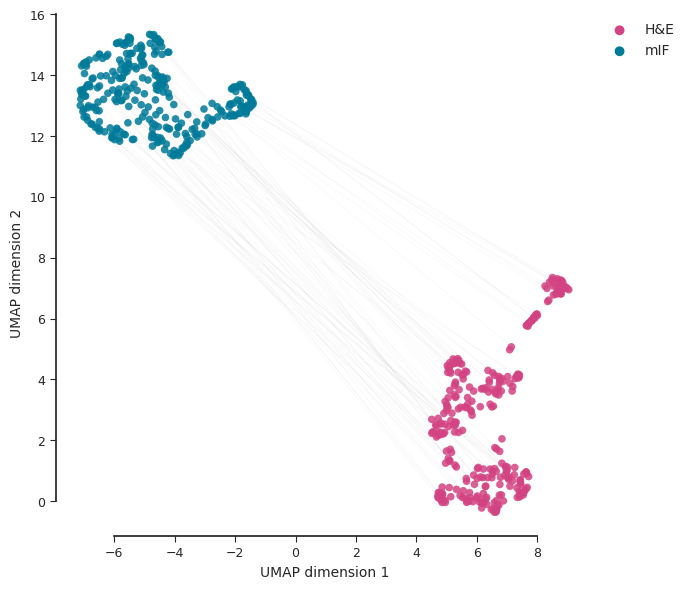

✅ Nature-Standard Vector file saved as Fig1b_Nature_UMAP.pdf.


In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Nature-standard typography: Helvetica/Arial
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
rcParams['pdf.fonttype'] = 42  # Ensures text is editable in Illustrator

def plot_nature_standard_umap(embedding_2d, n, save_path="Fig1b_Nature_UMAP.pdf"):
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # 1. High-Contrast Colorblind-Friendly Palette
    # Pink (#D34383) is good for H&E, using a slightly deeper Teal (#007A99) for mIF
    color_he = '#D34383'   
    color_mif = '#007A99'  

    # 2. Refined Semantic Bridges
    # Making lines thinner and more subtle so the focus remains on the clusters
    for i in range(0, n, 4): 
        ax.plot([embedding_2d[i, 0], embedding_2d[i+n, 0]], 
                [embedding_2d[i, 1], embedding_2d[i+n, 1]], 
                color='black', alpha=0.04, lw=0.4, zorder=1)

    # 3. Scatter Points with depth
    # Using 's=30' for a cleaner look when there are 600 total points
    ax.scatter(embedding_2d[:n, 0], embedding_2d[:n, 1], 
               c=color_he, label='H&E', 
               alpha=0.85, s=30, edgecolors='none', zorder=3)
    
    ax.scatter(embedding_2d[n:, 0], embedding_2d[n:, 1], 
               c=color_mif, label='mIF', 
               alpha=0.85, s=30, edgecolors='none', zorder=3)

    # 4. Nature-Standard Axis Styling
    # Remove Title (Nature style puts title in the caption)
    ax.set_xlabel("UMAP dimension 1", fontsize=10)
    ax.set_ylabel("UMAP dimension 2", fontsize=10)
    
    # Tick marks pointing outward (Standard for high-impact journals)
    ax.tick_params(direction='out', length=4, width=0.8, labelsize=9)
    
    # Despine (no top/right borders)
    sns.despine(ax=ax, trim=True) # Trim=True makes axes stop at the last tick

    # 5. Clean Legend
    leg = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
    for lh in leg.legend_handles: 
        lh.set_alpha(1)
        lh.set_sizes([50])

    plt.tight_layout()
    
    # Export for Illustrator
    plt.savefig(save_path, format='pdf', transparent=True, bbox_inches='tight')
    plt.show()
    print(f"✅ Nature-Standard Vector file saved as {save_path}.")

plot_nature_standard_umap(embedding_2d, n)

## Part 1: Extract Tile Counts per Cancer Type

/tmp/ipykernel_16500/2064492191.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df['Cancer Type'], rotation=45, ha='right', fontsize=11)


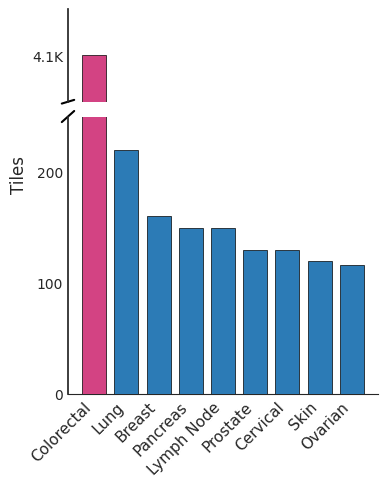

✅ CellSAM-Style Figure saved as Fig1c_Cancer_Distribution_Vertical.pdf


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

# 1. Setup Typography
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
rcParams['pdf.fonttype'] = 42
plt.style.use('seaborn-v0_8-white')

# Dummy data generation (Replace with your actual 'cancer_counts' extraction)
data_dist = {
    'Colorectal': 4100, 
    'Lung': 220,
    'Breast': 160,
    'Pancreas': 150,
    'Lymph Node': 150,
    'Prostate': 130,
    'Cervical': 130,
    'Skin': 120,
    'Ovarian': 116
}
df_dist = pd.DataFrame.from_dict(data_dist, orient='index', columns=['Tiles']).reset_index()
df_dist.columns = ['Cancer Type', 'Tiles']

# SORT DESCENDING (Highest on left)
df_dist = df_dist.sort_values('Tiles', ascending=False)

def plot_cellsam_style_distribution(df, save_path="Fig1c_Cancer_Distribution_Vertical.pdf"):
    # Create 2 subplots vertically (Top for outlier, Bottom for rest)
    # height_ratios=[1, 3] gives more space to the small bars
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 5),
                                   gridspec_kw={'height_ratios': [1, 3]}) 
    fig.subplots_adjust(hspace=0.08)  # Gap between split axes

    # Color Logic: Pink for CRC, Blue for Xenium (CellSAM uses blue, we keep your branding)
    colors = ['#D34383' if x == 'Colorectal' else '#2c7bb6' for x in df['Cancer Type']]
    
    # Plot Data on BOTH axes
    # We use zorder=3 to put bars in front of grid
    ax1.bar(df['Cancer Type'], df['Tiles'], color=colors, width=0.75, edgecolor='black', linewidth=0.5, zorder=3)
    ax2.bar(df['Cancer Type'], df['Tiles'], color=colors, width=0.75, edgecolor='black', linewidth=0.5, zorder=3)

    # --- AXIS BREAK LOGIC ---
    # Top Panel: Zoom in on Colorectal (e.g., 4000-4200)
    ax1.set_ylim(4000, 4200) 
    ax1.set_yticks([4100])      # Only show relevant tick
    ax1.set_yticklabels(["4.1K"]) # Format as "K"
    
    # Bottom Panel: Zoom in on rest (0-250)
    ax2.set_ylim(0, 250)
    ax2.set_yticks([0, 100, 200]) # Clean ticks
    
    # --- STYLING (The "Nature" Look) ---
    
    # 1. Remove Spines
    # Top Plot: Hide bottom, right, top
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    # Bottom Plot: Hide top, right
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # Keep bottom spine for x-axis labels? CellSAM often floats it.
    # Let's keep it but make it thin
    ax2.spines['bottom'].set_linewidth(0.8)

    # 2. X-Axis Labels (Rotated 45 degrees)
    ax2.set_xticklabels(df['Cancer Type'], rotation=45, ha='right', fontsize=11)
    ax1.tick_params(axis='x', length=0) # No ticks on top plot

    # 3. Y-Axis Label (Spanning both plots)
    # We place it manually so it centers nicely
    fig.text(-0.02, 0.55, 'Tiles', va='center', rotation='vertical', fontsize=12)

    # 4. Diagonal Cut Lines (The visual break)
    d = .02  # Size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    
    # Draw marks on the vertical axis lines
    # Top-left axis break
    ax1.plot((-d, +d), (-d, +d), **kwargs)      
    
    # Bottom-left axis break
    kwargs.update(transform=ax2.transAxes) 
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  

    # 5. Clean layout
    # Move title/labels slightly if needed
    
    plt.savefig(save_path, format='pdf', transparent=True, bbox_inches='tight')
    plt.show()
    print(f"✅ CellSAM-Style Figure saved as {save_path}")

plot_cellsam_style_distribution(df_dist)

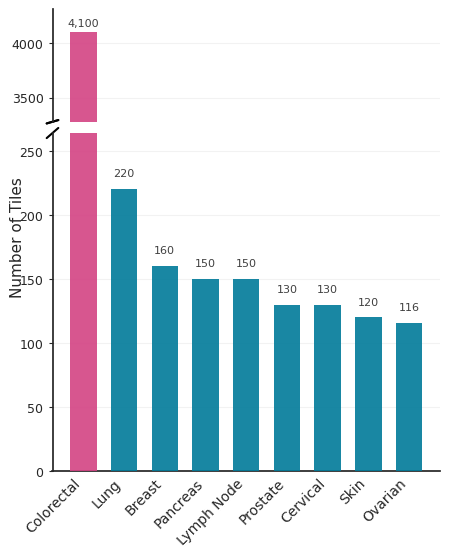

✅ Broken Axis Chart saved as Fig1c_Cancer_Distribution_Broken.pdf


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np

# 1. Setup Typography
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
rcParams['pdf.fonttype'] = 42
plt.style.use('seaborn-v0_8-white')

def plot_broken_axis_distribution(df, save_path="Fig1c_Cancer_Distribution_Broken.pdf"):
    # Create two subplots sharing the x-axis
    # ax1 (top) will show the outlier (CRC)
    # ax2 (bottom) will show the rest
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 6),
                                   gridspec_kw={'height_ratios': [1, 3]}) # Top is smaller
    fig.subplots_adjust(hspace=0.05)  # adjust space between axes

    # Color Logic
    colors = ['#D34383' if x == 'Colorectal' else '#007A99' for x in df['Cancer Type']]
    
    # Plot the SAME data on both axes
    ax1.bar(df['Cancer Type'], df['Tiles'], color=colors, width=0.65, alpha=0.9, zorder=3)
    ax2.bar(df['Cancer Type'], df['Tiles'], color=colors, width=0.65, alpha=0.9, zorder=3)

    # 2. Set Limits to create the "Break"
    # Bottom plot: 0 to slightly above the max of the SMALL classes (e.g., 250)
    # Top plot: A range around the HUGE class (e.g., 4000 to 4200)
    
    max_small = df[df['Cancer Type'] != 'Colorectal']['Tiles'].max()
    max_large = df['Tiles'].max()
    
    ax2.set_ylim(0, max_small * 1.2)  # Zoom in on small bars
    ax1.set_ylim(max_large * 0.8, max_large * 1.05) # Focus on CRC top
    
    # 3. Clean up spines (The "Nature" look)
    # Top plot: hide bottom spine
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # No X labels on top
    
    # Bottom plot: hide top spine
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # 4. Add "Diagonal Lines" to indicate the break
    d = .015  # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    
    # Top plot break lines
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-right diagonal (optional)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    # 5. Grid and Labels
    # We only want vertical grid lines if easier, but horizontal is better for counts
    ax1.grid(axis='y', color='black', alpha=0.05, linestyle='-', zorder=0)
    ax2.grid(axis='y', color='black', alpha=0.05, linestyle='-', zorder=0)
    
    # Y-Axis Labels
    ax1.tick_params(axis='y', direction='out', length=3, labelsize=9)
    ax2.tick_params(axis='y', direction='out', length=3, labelsize=9)
    
    # X-Axis Labels (Rotated)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    # Shared Label
    fig.text(0.04, 0.5, 'Number of Tiles', va='center', rotation='vertical', fontsize=11)

    # 6. Add Values on Top of Bars
    # For the small bars (on ax2)
    for i, (count, name) in enumerate(zip(df['Tiles'], df['Cancer Type'])):
        if name != 'Colorectal':
            ax2.text(i, count + 10, f'{int(count):,}', ha='center', fontsize=8, color='#404040')
            
    # For the CRC bar (on ax1)
    crc_idx = df.index[df['Cancer Type'] == 'Colorectal'][0]
    crc_val = df.loc[crc_idx, 'Tiles']
    # We need to find the integer x-position of 'Colorectal'
    # Since bar plot categories map to 0, 1, 2... we find where CRC is in the sorted df
    x_pos = list(df['Cancer Type']).index('Colorectal')
    ax1.text(x_pos, crc_val + 50, f'{int(crc_val):,}', ha='center', fontsize=8, color='#404040')

    plt.savefig(save_path, format='pdf', transparent=True, bbox_inches='tight')
    plt.show()
    print(f"✅ Broken Axis Chart saved as {save_path}")

# Run Plot
plot_broken_axis_distribution(df_dist)

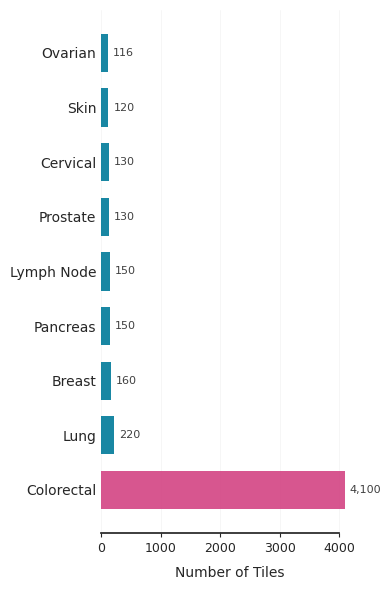

✅ Nature-Standard Chart saved as Fig1c_Cancer_Distribution.pdf


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 1. Setup Typography & Style (Matches your UMAP)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica']
rcParams['pdf.fonttype'] = 42
plt.style.use('seaborn-v0_8-white')

def plot_nature_cancer_distribution(df, save_path="Fig1c_Cancer_Distribution.pdf"):
    # Size: Narrower than UMAP to fit as a side panel (e.g., Panel C)
    fig, ax = plt.subplots(figsize=(4, 6)) 
    
    # 2. Consistent Color Logic
    # Pink (#D34383) for Colorectal (H&E source)
    # Teal (#007A99) for others (mIF source)
    colors = ['#D34383' if x == 'Colorectal' else '#007A99' for x in df['Cancer Type']]
    
    # 3. Create Horizontal Bar Chart
    bars = ax.barh(df['Cancer Type'], df['Tiles'], color=colors, 
                   edgecolor='none', height=0.7, alpha=0.9, zorder=3)
    
    # 4. Nature-Standard Styling
    # X-axis label only
    ax.set_xlabel("Number of Tiles", fontsize=10, labelpad=8)
    ax.set_ylabel("") # Redundant to label y-axis as "Cancer Type" when names are there
    
    # Grid: Vertical only, subtle, behind bars
    ax.grid(axis='x', color='black', alpha=0.05, linestyle='-', linewidth=0.5, zorder=0)
    
    # Axis lines (Despine top/right/left)
    # Nature often hides the y-axis line for bar charts, keeping only text labels
    sns.despine(ax=ax, left=True, bottom=False, trim=True)
    
    # Ticks
    ax.tick_params(axis='x', direction='out', length=3, width=0.8, labelsize=9)
    ax.tick_params(axis='y', length=0, labelsize=10) # No ticks on Y, just labels
    
    # 5. Add Value Labels (Optional but helpful for "Method" papers)
    for bar in bars:
        width = bar.get_width()
        # Place text slightly to the right of the bar
        ax.text(width + (df['Tiles'].max() * 0.02), # Offset 
                bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', 
                va='center', ha='left', 
                fontsize=8, color='#404040')

    # Adjust layout to make room for labels
    plt.tight_layout()
    
    # Export
    plt.savefig(save_path, format='pdf', transparent=True, bbox_inches='tight')
    plt.show()
    print(f"✅ Nature-Standard Chart saved as {save_path}")

# Run Plot
plot_nature_cancer_distribution(df_dist)